In [ ]:
# ===============================
# 1️⃣ Import Libraries & Load Dataset
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# --- Load original dataset ---
df = pd.read_csv(r"D:\Project DS Final\2025\check\final_clean_data.csv")  

# --- Select the features and target for classification ---
selected_columns = [
    "MONTH","DAY_OF_MONTH","DAY_OF_WEEK",
    "OP_UNIQUE_CARRIER","ORIGIN","DEST",
    "CRS_DEP_TIME","CRS_ARR_TIME",
    "CRS_ELAPSED_TIME","DISTANCE",
    "HourlyDewPointTemperature","HourlyDryBulbTemperature",
    "HourlyRelativeHumidity","HourlyVisibility","HourlyWindSpeed",
    "DEP_DEL15"   # target column
]

# --- Create a new DataFrame with only selected columns ---
df_classifi = df[selected_columns].copy()

# --- Check result ---
print("✅ New dataset created successfully.")
print("Shape:", df_classifi.shape)
print("Columns:", list(df_classifi.columns))



✅ New dataset created successfully.
Shape: (50029, 16)
Columns: ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'HourlyDewPointTemperature', 'HourlyDryBulbTemperature', 'HourlyRelativeHumidity', 'HourlyVisibility', 'HourlyWindSpeed', 'DEP_DEL15']


In [18]:
# --- Label encode categorical columns ---
label_cols = ["OP_UNIQUE_CARRIER", "ORIGIN", "DEST"]
le = LabelEncoder()

for col in label_cols:
    df_classifi[col] = le.fit_transform(df_classifi[col])

print("🔤 Label encoding completed for:", label_cols)

# --- Scale numeric columns ---
scale_cols = [
    "CRS_DEP_TIME","CRS_ARR_TIME","CRS_ELAPSED_TIME","DISTANCE",
    "HourlyDewPointTemperature","HourlyDryBulbTemperature",
    "HourlyRelativeHumidity","HourlyVisibility","HourlyWindSpeed"
]

scaler = StandardScaler()
df_classifi[scale_cols] = scaler.fit_transform(df_classifi[scale_cols])

print("📏 Scaling completed for numeric features.")

# --- Kiểm tra kết quả ---
print("\n✅ Encoded & scaled dataset preview:")
display(df_classifi.head())

print("DataFrame name: df_classifi")
print("Shape:", df_classifi.shape)


🔤 Label encoding completed for: ['OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST']
📏 Scaling completed for numeric features.

✅ Encoded & scaled dataset preview:


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed,DEP_DEL15
0,4,1,2,0,1,62,-1.371023,-1.053675,-0.190881,-0.222270,-1.469068,-2.530912,1.697315,-4.942427,0.447885,0.0
1,4,1,2,0,1,62,0.322520,0.511390,-0.285164,-0.222270,-1.469068,-1.567803,0.295272,0.191082,0.447885,1.0
2,4,1,2,0,4,14,-1.219136,0.012848,1.353008,1.492567,-0.874567,-1.781828,1.211992,0.191082,-0.588815,0.0
3,4,1,2,0,4,14,0.014948,1.171957,1.364794,1.492567,-0.280067,-1.139755,0.888444,0.191082,-0.588815,0.0
4,4,1,2,0,4,14,1.566096,-1.646583,1.364794,1.492567,-0.280067,-1.567803,1.535541,0.191082,-0.329640,0.0


DataFrame name: df_classifi
Shape: (50029, 16)


Check & Visualize Outliers

🔍 Outlier summary before clipping:


,Count,Percent
HourlyWindSpeed,3766.0,7.53
HourlyVisibility,2263.0,4.52
HourlyDryBulbTemperature,874.0,1.75
HourlyDewPointTemperature,824.0,1.65
CRS_DEP_TIME,0.0,0.00
DISTANCE,0.0,0.00
CRS_ELAPSED_TIME,1.0,0.00
CRS_ARR_TIME,0.0,0.00
HourlyRelativeHumidity,0.0,0.00


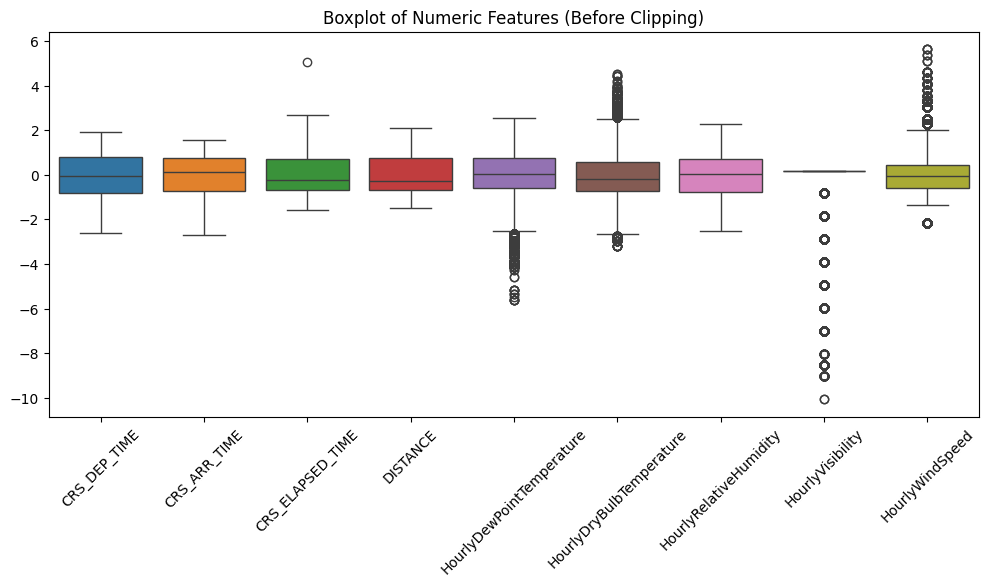

In [19]:
num_cols = [
    "CRS_DEP_TIME","CRS_ARR_TIME","CRS_ELAPSED_TIME","DISTANCE",
    "HourlyDewPointTemperature","HourlyDryBulbTemperature",
    "HourlyRelativeHumidity","HourlyVisibility","HourlyWindSpeed"
]

# --- Tính số lượng outlier ---
outlier_info = {}
for col in num_cols:
    Q1, Q3 = df_classifi[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    n_outliers = ((df_classifi[col] < lower) | (df_classifi[col] > upper)).sum()
    outlier_info[col] = [n_outliers, round(n_outliers/len(df_classifi)*100, 2)]

outlier_df = pd.DataFrame(outlier_info, index=['Count','Percent']).T.sort_values('Percent', ascending=False)
print("🔍 Outlier summary before clipping:")
display(outlier_df)

# --- Boxplot trực quan ---
plt.figure(figsize=(12,5))
sns.boxplot(data=df_classifi[num_cols])
plt.title("Boxplot of Numeric Features (Before Clipping)")
plt.xticks(rotation=45)
plt.show()


✅ Outlier clipping done.



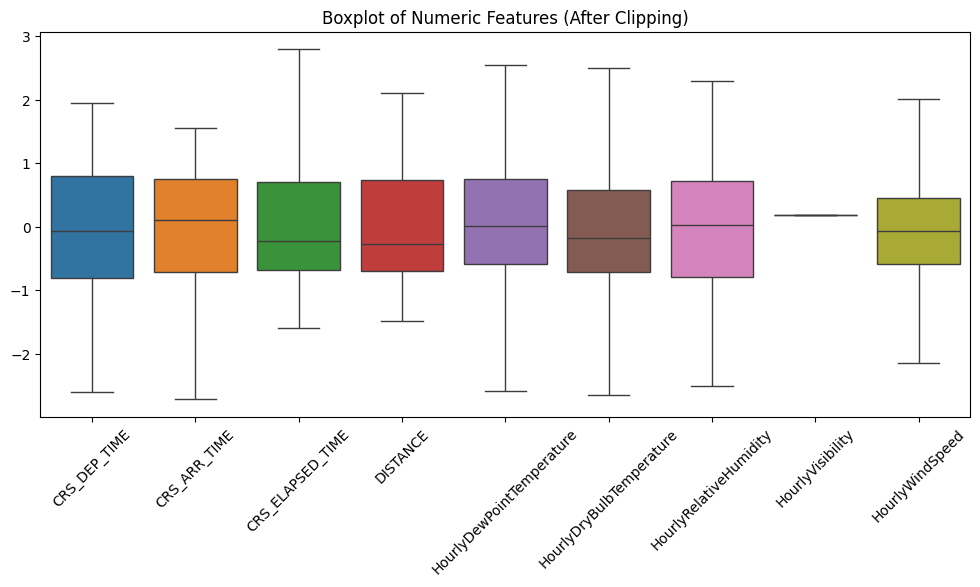

In [20]:
# ===============================
# 4️⃣ Clip Outliers & Recheck Statistics
# ===============================
for col in num_cols:
    Q1, Q3 = df_classifi[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_classifi[col] = df_classifi[col].clip(lower, upper)

print("✅ Outlier clipping done.\n")

# --- Boxplot sau khi clip ---
plt.figure(figsize=(12,5))
sns.boxplot(data=df_classifi[num_cols])
plt.title("Boxplot of Numeric Features (After Clipping)")
plt.xticks(rotation=45)
plt.show()

# --- Save to CSV file ---
df_classifi.to_csv(r"D:\Project DS Final\Data\classi_mod_data.csv", index=False)